In [1]:
%matplotlib notebook

In [2]:
from delta_psi_py import *

In [3]:
#Using the standard conditions, set up in the main library, the initial_sim_states is a 
#class that contains the standard initial values. To insert these values into the simulations,
#it is necessary to convert to a list, using the method .as_list(), as in the following:
# initial_sim_states.as_list() 

initial_sim_states=sim_states()
initial_sim_state_list=initial_sim_states.as_list()

Kx_initial=sim_constants()
Kx_initial.k_KEA=0
Kx_initial.fraction_pH_effect=.25
#perform an initial simulation to allow the system to reach equilibrium in the dark


original_dark_equilibrated_initial_y, output=dark_equibration(initial_sim_states.as_list(), 
                                                              Kx_initial, 60*60, return_kinetics=True)
All_Constants_Table('Standard Constants', Kx_initial)

FloatProgress(value=0.0, max=1.0)

Standard Constants


Parameter,New Value
pKreg,6.5
max_PSII,1
kQA,1000
max_b6f,500
lumen_protons_per_turnover,1.4e-05
light_per_L,0.0
ATP_synthase_max_turnover,1000
pHstroma,7.8
antenna_size,1
Volts_per_chargese,0.033


In [4]:
All_Constants_Table('Standard Initial States', initial_sim_states)

Standard Initial States


Parameter,New Value
QA_content,1
QAm_content,0
PQ_content,6
PQH2_content,0
Hin,0.0
pHlumen,7.010413517720576
Dy,0.0473751889367654
pmf,0.0947503778735308
DeltaGatp,0.4421052631578947
Klumen,0.04


In [5]:
#generate a dictionary to hold the results of the simulations.

output_dict={}
constants_dict={}
starting_conditions_dict={}

In [6]:
import pandas as pd

set_of_c_stoichiometries = {8:'tab:blue',11:'tab:green',14:'black',17:'tab:purple'}



In [14]:
light_intensities = {50:'-',100:':',1000:'--'}

In [8]:
for intensity in light_intensities:
    baseline_duration=150 #in seconds
    baseline_intensity=0 #dark baseline intensity
    pulse_duration=600 #600 seconds (10 minute) pulse
    pulse_intensity=intensity #pulse is X intensity units
    recovery_duration = 500 #500 seconds recovery
    recovery_intensity=0 #recovery is dark
    rise_time=1 #1000 ms for the light to rise
    time_units='seconds' 
    point_frequency=100 #start with a frequency of 100 points per subtrace
    repeat_cycles=1 #do this once
    wave=generate_square_wave_based_light_sequence (baseline_duration, baseline_intensity,
                        pulse_duration, pulse_intensity, recovery_duration, recovery_intensity, 
                        rise_time, time_units, point_frequency, repeat_cycles)
    light_pattern['single_square_10_min_pulse_'+str(intensity)+'_max']=wave

In [9]:
for intensity in light_intensities:
    print(intensity)
    for c_stoichiometry in set_of_c_stoichiometries:
        n = c_stoichiometry/3
        on='single 10 min '+str(intensity)+' light pulse c subunits='+str(c_stoichiometry) #the output name
        print('n='+str(n))
        print(on)
        Kx=sim_constants() #generrate arrays contining optimized time segments for the simulation
        Kx.k_KEA=0
        Kx.fraction_pH_effect=.25

        Kx.n=n
        constants_dict[on]=Kx #store constants in constants_dict

        constants_dict[on]=Kx #store constants in constants_dict

        output_dict[on], starting_conditions_dict[on]=sim(Kx, original_dark_equilibrated_initial_y, 
                                                light_pattern['single_square_10_min_pulse_'+str(intensity)+'_max'],
                                                max_light_change, points_per_segment, dark_equilibration=60*60)

        Changed_Constants_Table('Change Constants', Kx_initial, Kx)

1000
n=2.6666666666666665
single 10 min 1000 light pulse c subunits=8


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


Changed Parameter,Old Value,New Value
n,4.666666666666667,2.6666666666666665


n=3.6666666666666665
single 10 min 1000 light pulse c subunits=11


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


Changed Parameter,Old Value,New Value
n,4.666666666666667,3.6666666666666665


n=4.666666666666667
single 10 min 1000 light pulse c subunits=14


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


Changed Parameter,Old Value,New Value


n=5.666666666666667
single 10 min 1000 light pulse c subunits=17


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


Changed Parameter,Old Value,New Value
n,4.666666666666667,5.666666666666667


50
n=2.6666666666666665
single 10 min 50 light pulse c subunits=8


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=67.0)

Change Constants


Changed Parameter,Old Value,New Value
n,4.666666666666667,2.6666666666666665


n=3.6666666666666665
single 10 min 50 light pulse c subunits=11


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=67.0)

Change Constants


Changed Parameter,Old Value,New Value
n,4.666666666666667,3.6666666666666665


n=4.666666666666667
single 10 min 50 light pulse c subunits=14


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=67.0)

Change Constants


Changed Parameter,Old Value,New Value


n=5.666666666666667
single 10 min 50 light pulse c subunits=17


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=67.0)

Change Constants


Changed Parameter,Old Value,New Value
n,4.666666666666667,5.666666666666667


100
n=2.6666666666666665
single 10 min 100 light pulse c subunits=8


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


Changed Parameter,Old Value,New Value
n,4.666666666666667,2.6666666666666665


n=3.6666666666666665
single 10 min 100 light pulse c subunits=11


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


Changed Parameter,Old Value,New Value
n,4.666666666666667,3.6666666666666665


n=4.666666666666667
single 10 min 100 light pulse c subunits=14


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


Changed Parameter,Old Value,New Value


n=5.666666666666667
single 10 min 100 light pulse c subunits=17


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


Changed Parameter,Old Value,New Value
n,4.666666666666667,5.666666666666667


<IPython.core.display.Javascript object>


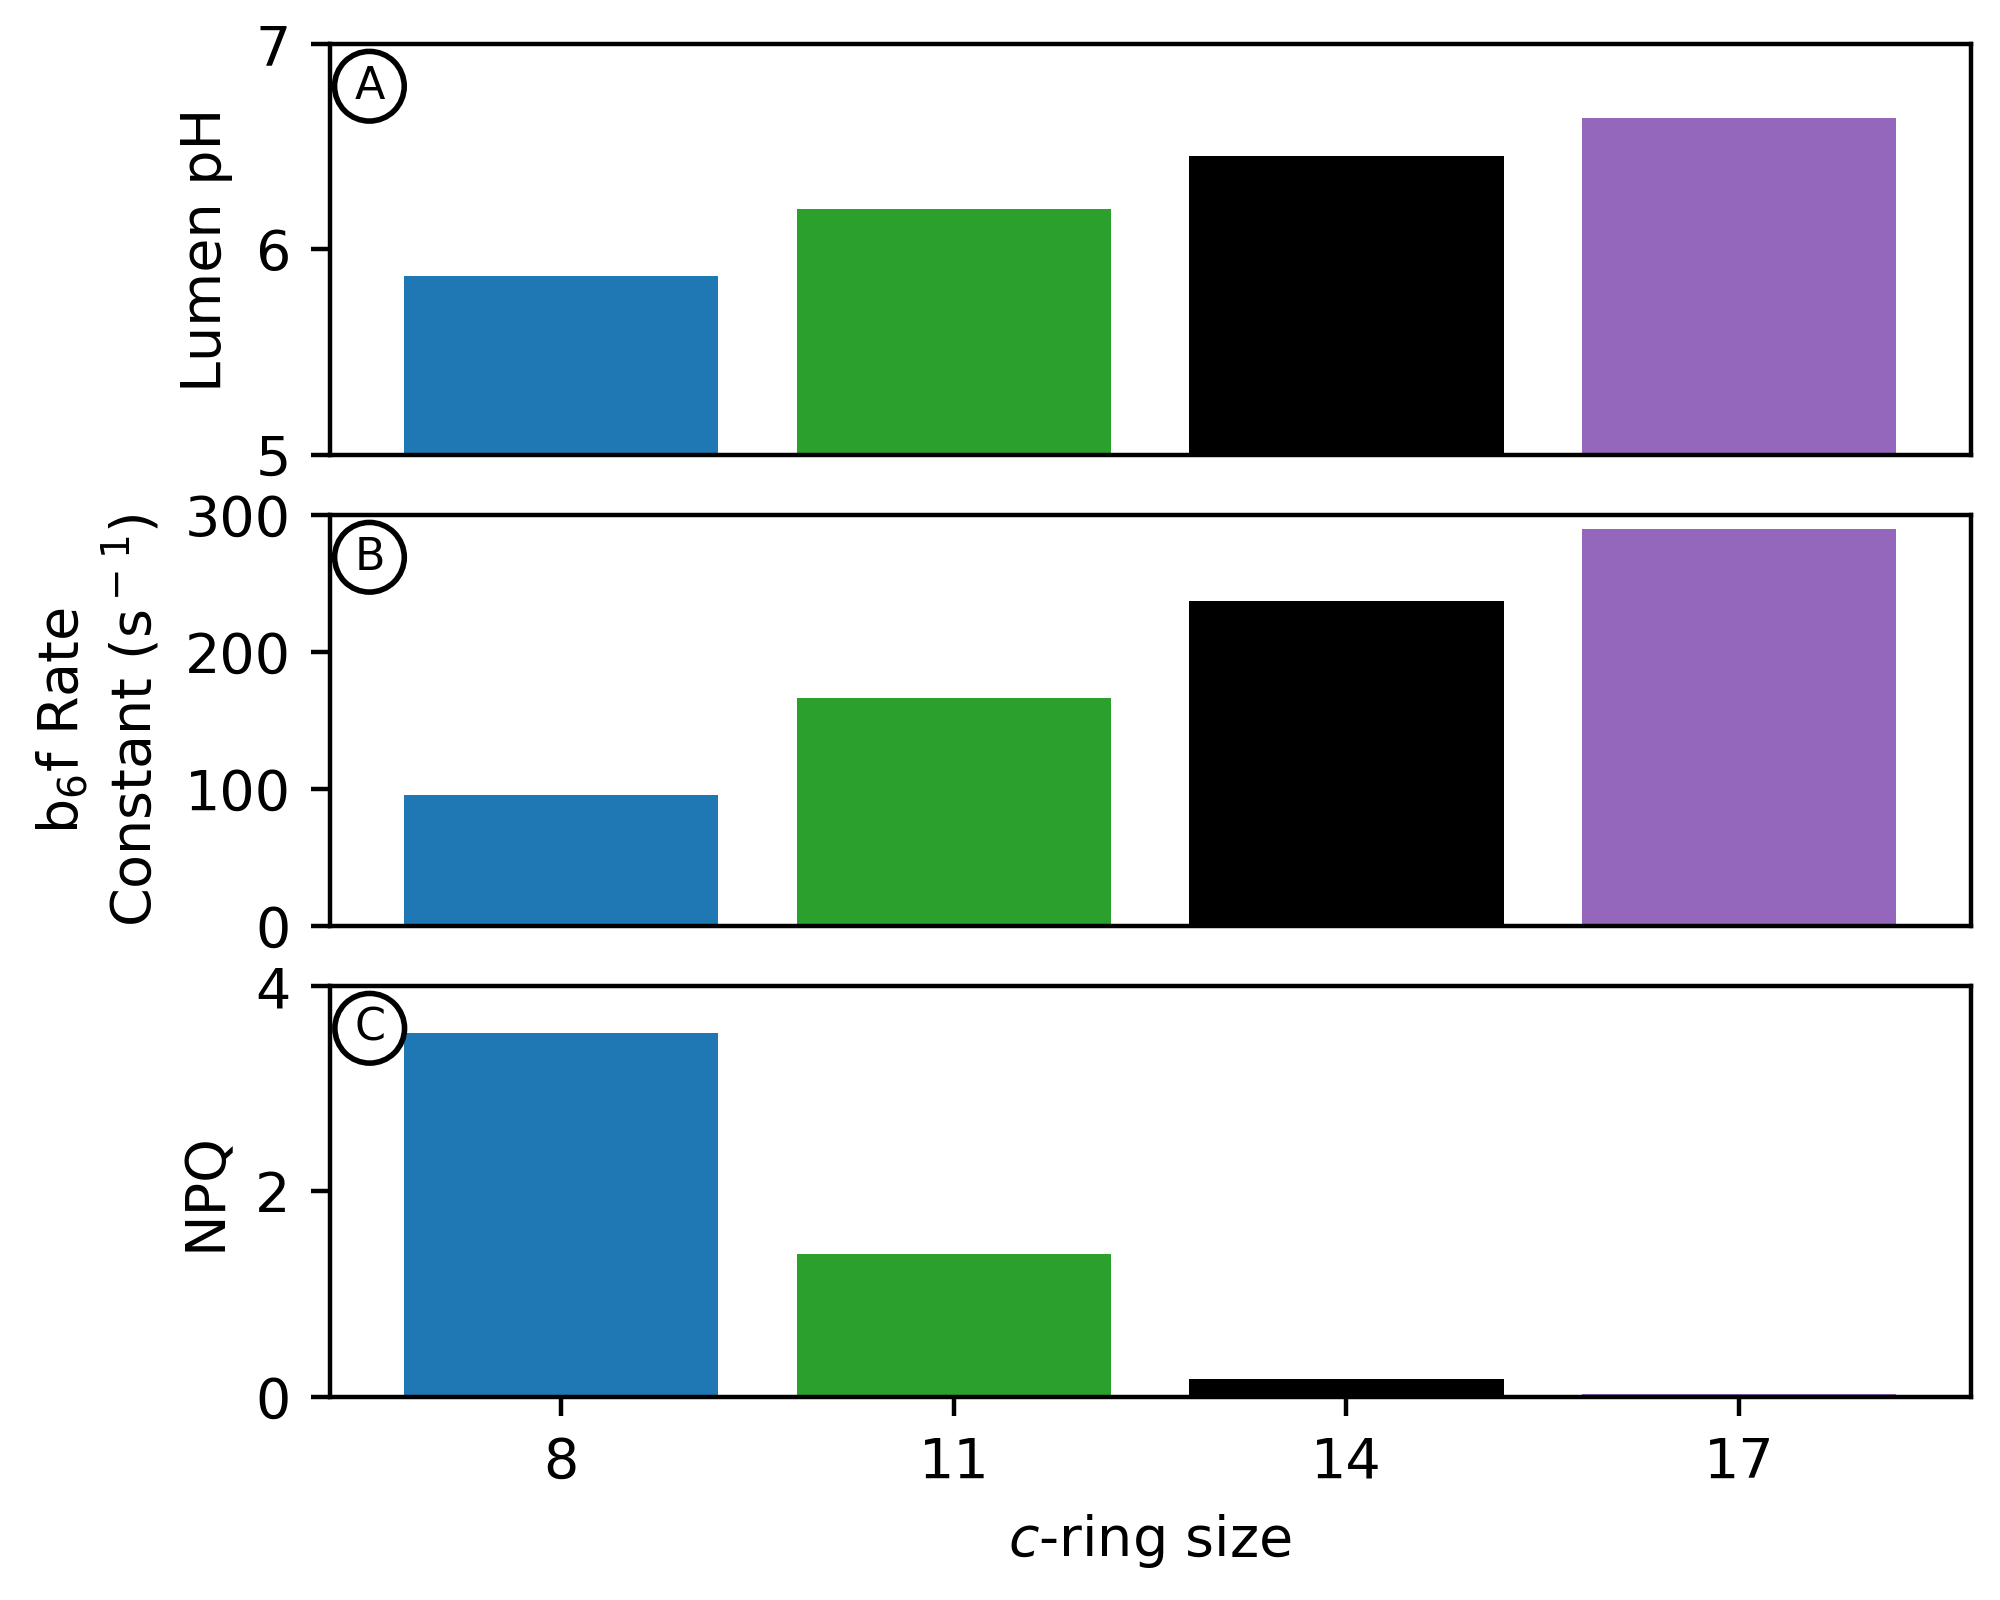

In [10]:
fig = plt.figure('c-subunit variation dark conditions', figsize=(5,4), dpi=200)
ax1 = fig.add_subplot(311)
#ax1b = ax1.twinx()
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
for key in output_dict:
    c=key.split('=')[1]
    if "single 10 min" in str(key):
        ax1.bar(c,output_dict[key]['pHlumen'][0], color=set_of_c_stoichiometries[int(c)])
        ax2.bar(c,output_dict[key]['b6f_control'][0],color=set_of_c_stoichiometries[int(c)])            
        ax3.bar(c,output_dict[key]['NPQ'][0],color=set_of_c_stoichiometries[int(c)])

ax1.set_ylabel('Lumen pH')
ax2.set_ylabel('b$_6$f Rate\nConstant (s$^-$$^1$)')
ax3.set_ylabel('NPQ')
ax3.set_xlabel(r'$c$-ring size')
ax1.get_xaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
ax1.set_ylim(bottom=5,top=7)
ax2.set_ylim(bottom=0,top=300)
ax3.set_ylim(bottom=0,top=4)


props = dict(boxstyle='circle', facecolor='white')
ax1.text(.015, .95, 'A', transform=ax1.transAxes, fontsize=8,verticalalignment='top', bbox=props)
ax2.text(.015, .95, 'B', transform=ax2.transAxes, fontsize=8,verticalalignment='top', bbox=props)
ax3.text(.015, .95, 'C', transform=ax3.transAxes, fontsize=8,verticalalignment='top', bbox=props)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=.0)
plt.show()

<IPython.core.display.Javascript object>


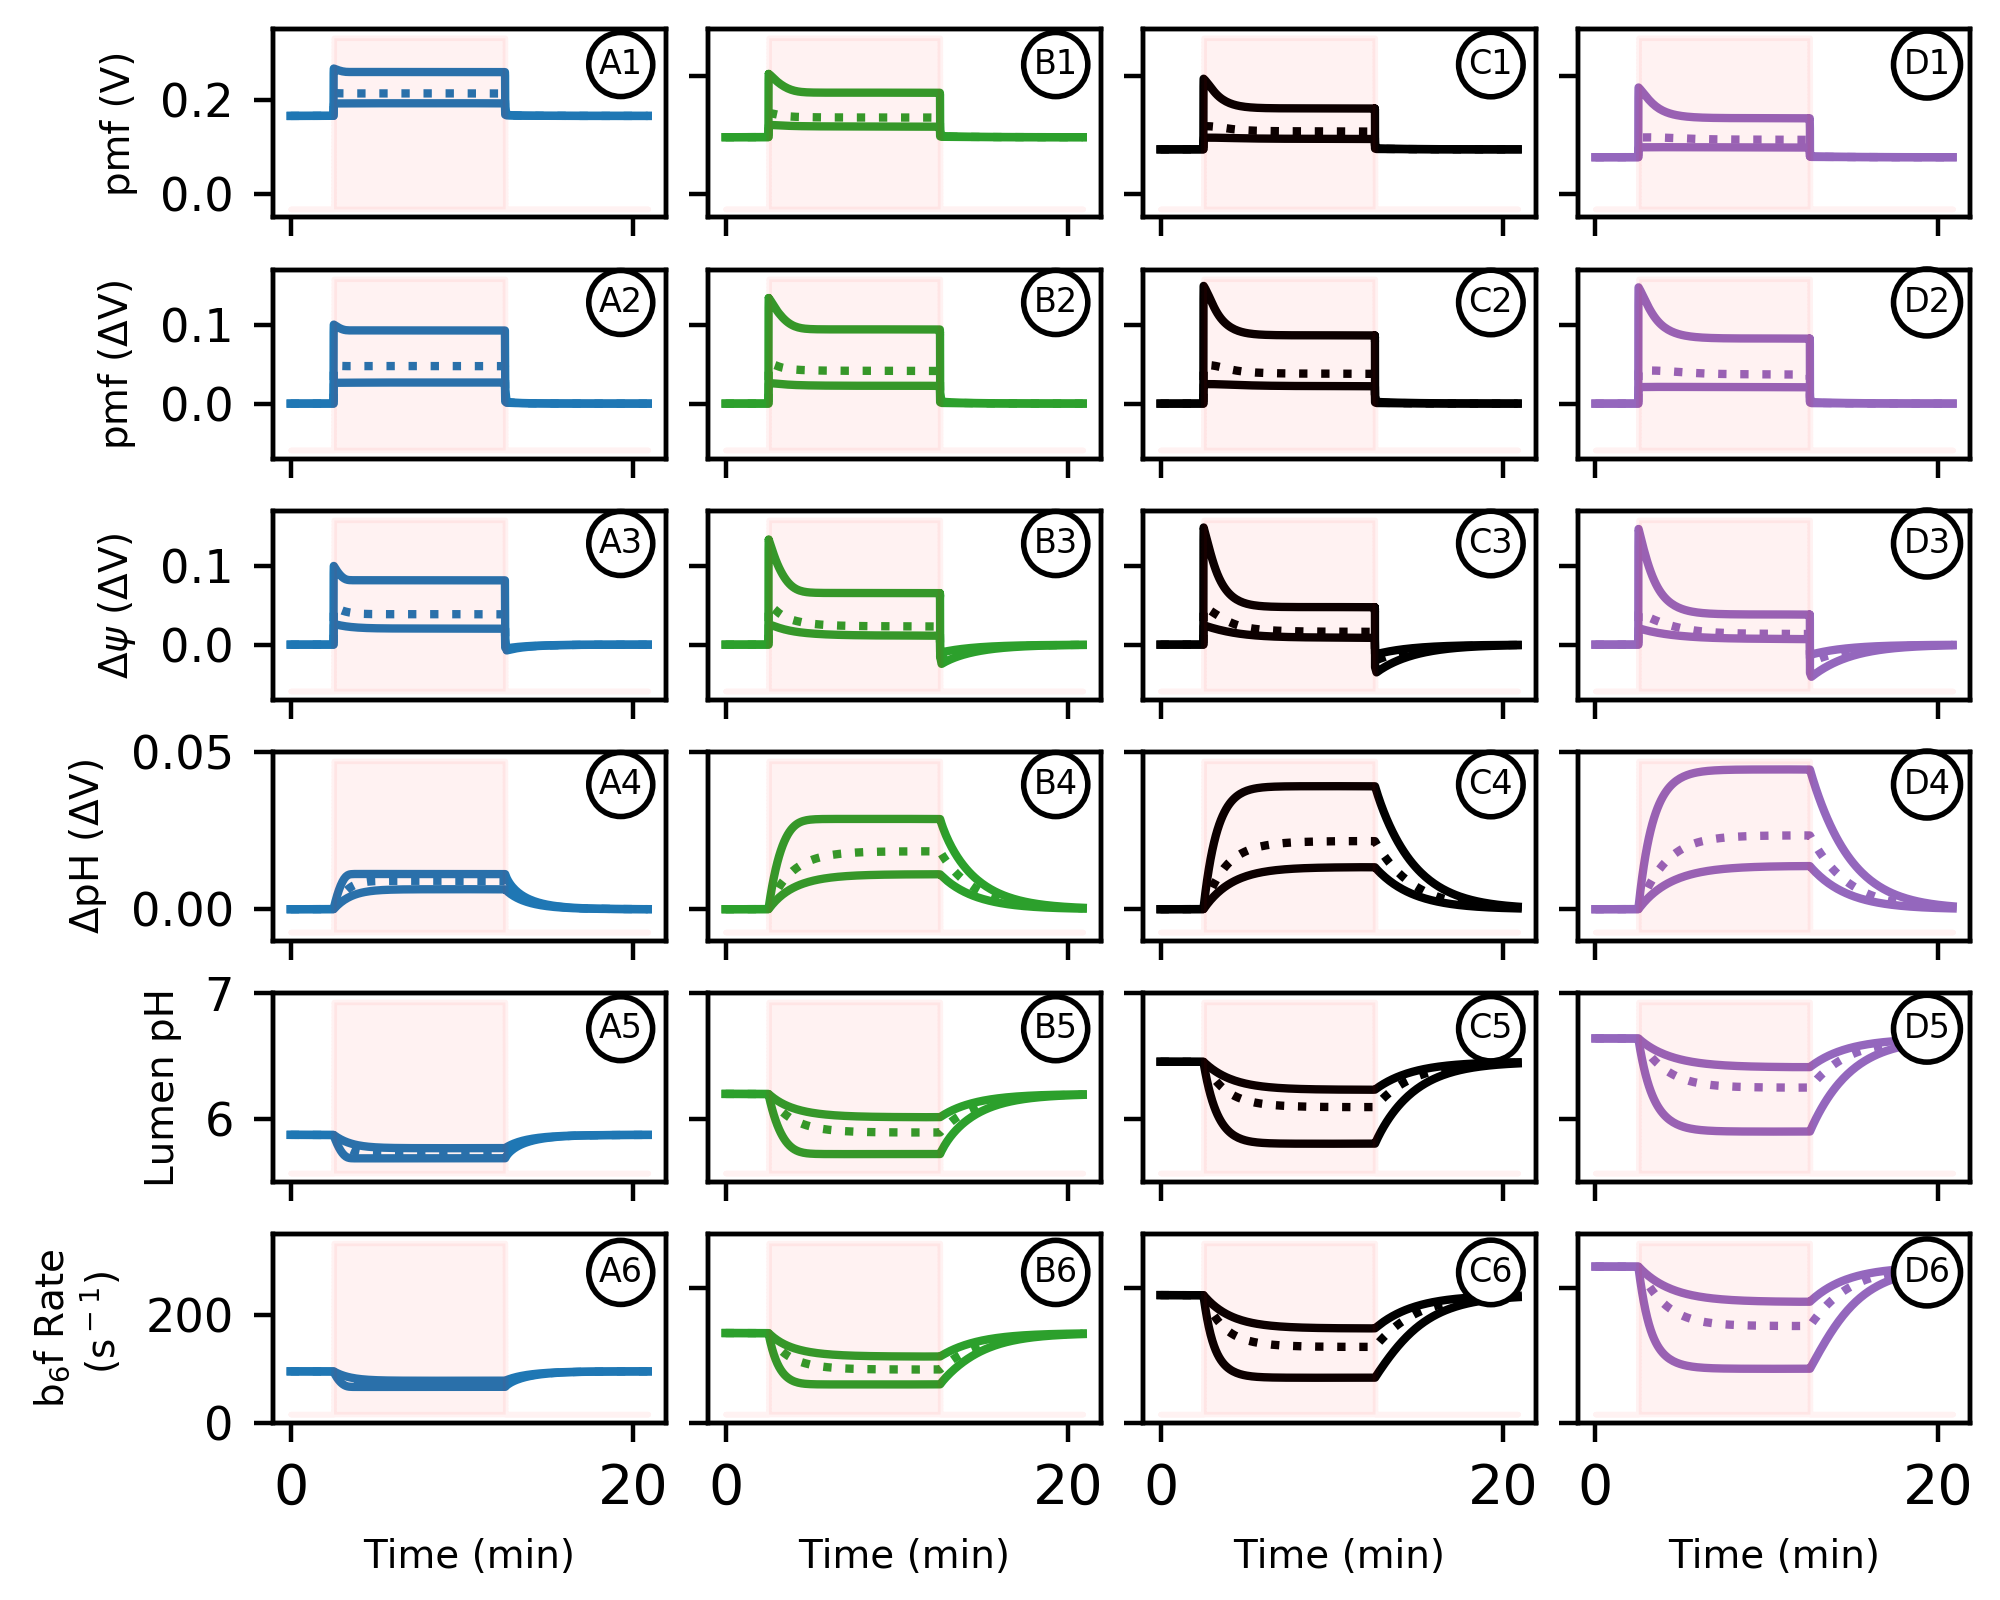

In [31]:
fig = plt.figure('c-subunit variation 10 min light', figsize=(5,4), dpi=200)
ax1 = fig.add_subplot(6,4,1)
ax2 = fig.add_subplot(6,4,2)
ax3 = fig.add_subplot(6,4,3)
ax4 = fig.add_subplot(6,4,4)
ax5 = fig.add_subplot(6,4,5)
ax6 = fig.add_subplot(6,4,6)
ax7 = fig.add_subplot(6,4,7)
ax8 = fig.add_subplot(6,4,8)
ax9 = fig.add_subplot(6,4,9)
ax10 = fig.add_subplot(6,4,10)
ax11 = fig.add_subplot(6,4,11)
ax12 = fig.add_subplot(6,4,12)
ax13 = fig.add_subplot(6,4,13)
ax14 = fig.add_subplot(6,4,14)
ax15 = fig.add_subplot(6,4,15)
ax16 = fig.add_subplot(6,4,16)
ax17 = fig.add_subplot(6,4,17)
ax18 = fig.add_subplot(6,4,18)
ax19 = fig.add_subplot(6,4,19)
ax20 = fig.add_subplot(6,4,20)
ax21 = fig.add_subplot(6,4,21)
ax22 = fig.add_subplot(6,4,22)
ax23 = fig.add_subplot(6,4,23)
ax24 = fig.add_subplot(6,4,24)
ax1b = ax1.twinx()
ax2b = ax2.twinx()
ax3b = ax3.twinx()
ax4b = ax4.twinx()
ax5b = ax5.twinx()
ax6b = ax6.twinx()
ax7b = ax7.twinx()
ax8b = ax8.twinx()
ax9b = ax9.twinx()
ax10b = ax10.twinx()
ax11b = ax11.twinx()
ax12b = ax12.twinx()
ax13b = ax13.twinx()
ax14b = ax14.twinx()
ax15b = ax15.twinx()
ax16b = ax16.twinx()
ax17b = ax17.twinx()
ax18b = ax18.twinx()
ax19b = ax19.twinx()
ax20b = ax20.twinx()
ax21b = ax21.twinx()
ax22b = ax22.twinx()
ax23b = ax23.twinx()
ax24b = ax24.twinx()

for key in output_dict:
    if "single 10 min" in str(key):
        c=key.split('=')[1]
        light=key.split('single 10 min ')[1]
        light=light.split(' light')[0]
          
        if c == "8": 
            ax1.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], color=set_of_c_stoichiometries[int(c)],linestyle=light_intensities[int(light)][0])
            ax5.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], color=set_of_c_stoichiometries[int(c)],linestyle=light_intensities[int(light)][0])
            ax9.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], color=set_of_c_stoichiometries[int(c)],linestyle=light_intensities[int(light)][0])
            ax13.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], color=set_of_c_stoichiometries[int(c)],linestyle=light_intensities[int(light)][0])
            ax17.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], color=set_of_c_stoichiometries[int(c)],linestyle=light_intensities[int(light)][0])
            ax21.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], color=set_of_c_stoichiometries[int(c)],linestyle=light_intensities[int(light)][0])
        if c == "11": 
            ax2.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], color=set_of_c_stoichiometries[int(c)],linestyle=light_intensities[int(light)][0])
            ax6.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], color=set_of_c_stoichiometries[int(c)],linestyle=light_intensities[int(light)][0])
            ax10.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], color=set_of_c_stoichiometries[int(c)],linestyle=light_intensities[int(light)][0])
            ax14.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], color=set_of_c_stoichiometries[int(c)],linestyle=light_intensities[int(light)][0])
            ax18.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], color=set_of_c_stoichiometries[int(c)],linestyle=light_intensities[int(light)][0])
            ax22.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], color=set_of_c_stoichiometries[int(c)],linestyle=light_intensities[int(light)][0])
        if c == "14":
            ax3.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], color=set_of_c_stoichiometries[int(c)],linestyle=light_intensities[int(light)][0])
            ax7.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], color=set_of_c_stoichiometries[int(c)],linestyle=light_intensities[int(light)][0])
            ax11.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], color=set_of_c_stoichiometries[int(c)],linestyle=light_intensities[int(light)][0])
            ax15.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], color=set_of_c_stoichiometries[int(c)],linestyle=light_intensities[int(light)][0])
            ax19.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], color=set_of_c_stoichiometries[int(c)],linestyle=light_intensities[int(light)][0])
            ax23.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], color=set_of_c_stoichiometries[int(c)], label=light,linestyle=light_intensities[int(light)][0])
        if c == "17":
            ax4.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], color=set_of_c_stoichiometries[int(c)],linestyle=light_intensities[int(light)][0])                
            ax8.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], color=set_of_c_stoichiometries[int(c)],linestyle=light_intensities[int(light)][0])
            ax12.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], color=set_of_c_stoichiometries[int(c)],linestyle=light_intensities[int(light)][0])
            ax16.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], color=set_of_c_stoichiometries[int(c)],linestyle=light_intensities[int(light)][0])
            ax20.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], color=set_of_c_stoichiometries[int(c)],linestyle=light_intensities[int(light)][0])
            ax24.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], color=set_of_c_stoichiometries[int(c)],linestyle=light_intensities[int(light)][0])

axes = [ax1b,ax2b,ax3b,ax4b,ax5b,ax6b,ax7b,ax8b,ax9b,ax10b,ax11b,ax12b,ax13b,ax14b,ax15b,ax16b,ax17b,ax18b,ax19b,ax20b,ax21b,ax22b,ax23b,ax24b]

for key in output_dict:
    for i in range(len(axes)):
        subplot=axes[i]
        if "single 10 min" in str(key):
            c=key.split('=')[1]
            light=key.split('single 10 min ')[1]
            light=light.split(' light')[0]        
            if light == '1000' and c == '8':
                subplot.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,color='red', alpha=0.05,zorder=2)

ax1.set_ylabel('pmf (V)',fontsize=7)
ax5.set_ylabel('pmf ($\Delta$V)',fontsize=7)
ax9.set_ylabel('$\Delta$$\psi$ ($\Delta$V)',fontsize=7)
ax13.set_ylabel('$\Delta$pH ($\Delta$V)',fontsize=7)
ax17.set_ylabel('Lumen pH',fontsize=7)
ax21.set_ylabel('b$_6$f Rate\n (s$^-$$^1$)',fontsize=7)

axes = [ax2,ax3,ax4,ax6,ax7,ax8,ax10,ax11,ax12,ax14,ax15,ax16,ax18,ax19,ax20,ax22,ax23,ax24,
        ax1b,ax2b,ax3b,ax4b,ax5b,ax6b,ax7b,ax8b,ax9b,ax10b,ax11b,ax12b,ax13b,
        ax14b,ax15b,ax16b,ax17b,ax18b,ax19b,ax20b,ax21b,ax22b,ax23b,ax24b]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.set_yticklabels([])
    
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,        
        ax1b,ax2b,ax3b,ax4b,ax5b,ax6b,ax7b,ax8b,ax9b,ax10b,ax11b,ax12b,ax13b,
        ax14b,ax15b,ax16b,ax17b,ax18b,ax19b,ax20b]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.set_xticklabels([])
    
axes = [ax1b,ax2b,ax3b,ax4b,ax5b,ax6b,ax7b,ax8b,ax9b,ax10b,ax11b,ax12b,ax13b,
        ax14b,ax15b,ax16b,ax17b,ax18b,ax19b,ax20b,ax21b,ax22b,ax23b,ax24b]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.tick_params(right='off')


ax1.set_xticklabels([])
props = dict(boxstyle='circle', facecolor='white')
axes = [ax1,ax2,ax3,ax4]
labels = ['A1','B1','C1','D1']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(18, .31, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.05, top=0.35)
axes = [ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]
labels = ['A2','B2','C2','D2','A3','B3','C3','D3']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(18, .15, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.07, top=0.17)
axes = [ax13,ax14,ax15,ax16]
labels = ['A4','B4','C4','D4']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(18, .045, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.01, top=0.05)
axes = [ax17,ax18,ax19,ax20]
labels = ['A5','B5','C5','D5']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(18, 6.85, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=5.5, top=7)
axes = [ax21,ax22,ax23,ax24]
labels = ['A6','B6','C6','D6']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(18, 310, label, fontsize=6,verticalalignment='top', bbox=props) 
    subplot.set_ylim(bottom=0, top=350)
    subplot.set_xlabel('Time (min)',fontsize=7)
axes = [ax1,ax5,ax9,ax13,ax17,ax21]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.tick_params(axis='y',labelsize='small')
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=.5)
plt.show()

In [32]:
baseline_duration=150 #in seconds
baseline_intensity=0 #dark baseline
pulse_duration=3600 #3600 seconds pulse
pulse_intensity=201.3 #pulse is 1000 units
recovery_duration = 500 #100 seconds recovery
recovery_intensity=0 #recovery is dark
rise_time=1 #100 ms for the light to rise
time_units='seconds' 
point_frequency=100 #start with a frequency of 1000 points per subtrace
repeat_cycles=1 #do this once
wave=generate_square_wave_based_light_sequence (baseline_duration, baseline_intensity,
                    pulse_duration, pulse_intensity, recovery_duration, recovery_intensity, 
                    rise_time, time_units, point_frequency, repeat_cycles)
light_pattern['single_square_60_min_201.3_max']=wave

In [33]:
for c_stoichiometry in set_of_c_stoichiometries:
    n = c_stoichiometry/3
    on='single pulse 201.3umolE subunits='+str(c_stoichiometry) #the output name

    Kx=sim_constants() #generrate arrays contining optimized time segments for the simulation
    Kx.k_KEA=0
    Kx.fraction_pH_effect=.25

    Kx.n=n
    constants_dict[on]=Kx #store constants in constants_dict

    constants_dict[on]=Kx #store constants in constants_dict

    output_dict[on], starting_conditions_dict[on]=sim(Kx, original_dark_equilibrated_initial_y, 
                                            light_pattern['single_square_60_min_201.3_max'], 
                                            max_light_change, points_per_segment, dark_equilibration=60*60)
    
    Changed_Constants_Table('Change Constants', Kx_initial, Kx)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


Changed Parameter,Old Value,New Value
n,4.666666666666667,2.6666666666666665


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


Changed Parameter,Old Value,New Value
n,4.666666666666667,3.6666666666666665


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


Changed Parameter,Old Value,New Value


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


Changed Parameter,Old Value,New Value
n,4.666666666666667,5.666666666666667


In [34]:
#make a single one-hour sin wave with max PAR of 300 uE
total_duration=60*60 #duration is in seconds, so we do 3600 
light_frequency=1/(60*60) #make the frequency the same as the duration to get one cycle
points_per_second=10
max_PAR=402.71
wave=generate_sin_wave (total_duration, max_PAR, light_frequency, points_per_second)
light_pattern['single_sin_wave_1_hr_402.71_max']=wave

In [35]:
for c_stoichiometry in set_of_c_stoichiometries:
    n = c_stoichiometry/3
    on='single sin wave 402.71umolE subunits='+str(c_stoichiometry) #the output name

    Kx=sim_constants() #generrate arrays contining optimized time segments for the simulation
    Kx.k_KEA=0
    Kx.fraction_pH_effect=.25

    Kx.n=n
    constants_dict[on]=Kx #store constants in constants_dict

    constants_dict[on]=Kx #store constants in constants_dict

    output_dict[on], starting_conditions_dict[on]=sim(Kx, original_dark_equilibrated_initial_y, 
                                            light_pattern['single_sin_wave_1_hr_402.71_max'], 
                                            max_light_change, points_per_segment, dark_equilibration=60*60)

    Changed_Constants_Table('Change Constants', Kx_initial, Kx)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=773.0)

Change Constants


Changed Parameter,Old Value,New Value
light_per_L,0.0,0.9991346263789401
n,4.666666666666667,2.6666666666666665


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=773.0)

Change Constants


Changed Parameter,Old Value,New Value
light_per_L,0.0,0.9991346263789401
n,4.666666666666667,3.6666666666666665


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=773.0)

Change Constants


Changed Parameter,Old Value,New Value
light_per_L,0.0,0.9991346263789401


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=773.0)

Change Constants


Changed Parameter,Old Value,New Value
light_per_L,0.0,0.9991346263789401
n,4.666666666666667,5.666666666666667


In [36]:
for c_stoichiometry in set_of_c_stoichiometries:
    n = c_stoichiometry/3
    on='square wave 60 min max 400 light subunits='+str(c_stoichiometry) #the output name

    Kx=sim_constants() #generrate arrays contining optimized time segments for the simulation
    Kx.k_KEA=0
    Kx.fraction_pH_effect=.25

    Kx.n=n
    constants_dict[on]=Kx #store constants in constants_dict

    constants_dict[on]=Kx #store constants in constants_dict

    output_dict[on], starting_conditions_dict[on]=sim(Kx, original_dark_equilibrated_initial_y, 
                                            light_pattern['one_hour_5_min_cycle_square_wave_max_PAR_600'], 
                                            max_light_change, points_per_segment, dark_equilibration=60*60)
    Changed_Constants_Table('Change Constants', Kx_initial, Kx)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1201.0)

Change Constants


Changed Parameter,Old Value,New Value
n,4.666666666666667,2.6666666666666665


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1201.0)

Change Constants


Changed Parameter,Old Value,New Value
n,4.666666666666667,3.6666666666666665


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1201.0)

Change Constants


Changed Parameter,Old Value,New Value


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1201.0)

Change Constants


Changed Parameter,Old Value,New Value
n,4.666666666666667,5.666666666666667


<IPython.core.display.Javascript object>


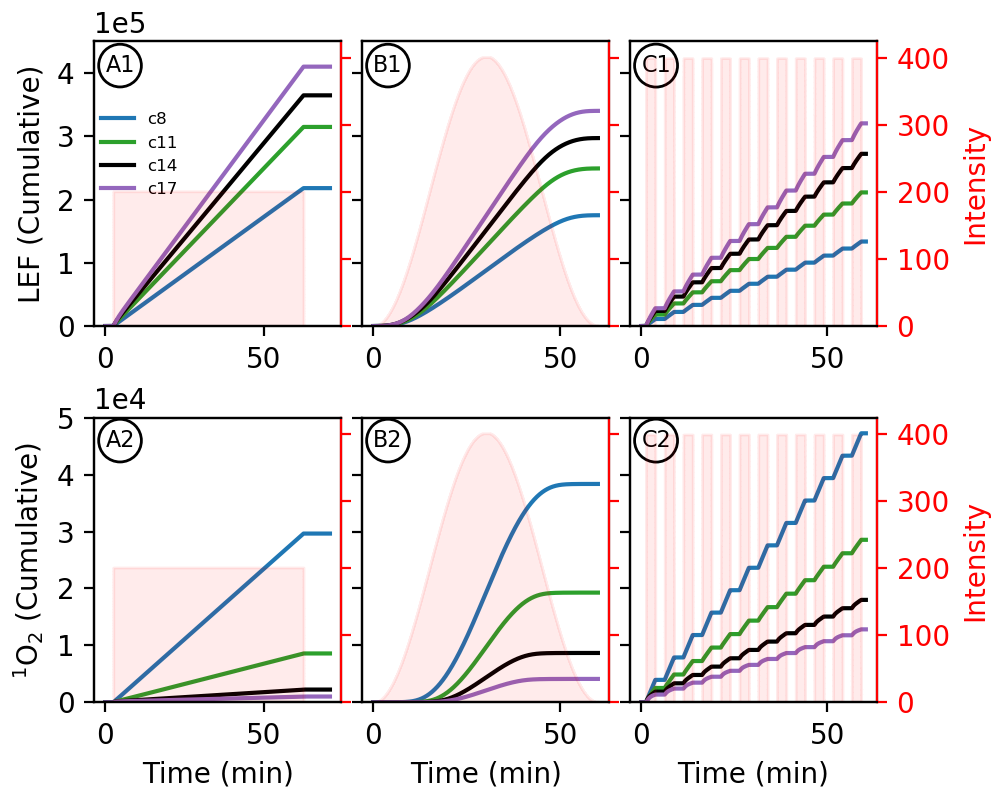

In [64]:
fig = plt.figure('c-subunit variation 1O2 production potential equal total light', figsize=(5,4), dpi=200)
ax1 = fig.add_subplot(231)
ax1b = ax1.twinx()
ax2 = fig.add_subplot(232)
ax2b = ax2.twinx()
ax3 = fig.add_subplot(233)
ax3b = ax3.twinx()
ax4 = fig.add_subplot(234)
ax4b = ax4.twinx()
ax5 = fig.add_subplot(235)
ax5b = ax5.twinx()
ax6 = fig.add_subplot(236)
ax6b = ax6.twinx()

for key in output_dict:
    c=key.split('=')[1]
    if c == "8" or "11" or "14" or "17":
        if "single pulse 201.3umolE subunits" in str(key):
            ax1.plot(output_dict[key]['time_axis']/60,output_dict[key]['LEF_cumulative'], color=set_of_c_stoichiometries[int(c)], label="c"+str(c))
            ax1b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,color='red', alpha=0.02,zorder=2)
            ax4.plot(output_dict[key]['time_axis']/60,output_dict[key]['singletO2_array'], color=set_of_c_stoichiometries[int(c)])
            ax4b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,color='red', alpha=0.02,zorder=2)
        if "single sin wave 402.71umolE subunits" in str(key):
            ax2.plot(output_dict[key]['time_axis']/60,output_dict[key]['LEF_cumulative'], color=set_of_c_stoichiometries[int(c)], label=str(c))
            ax2b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,color='red', alpha=0.02,zorder=2)
            ax5.plot(output_dict[key]['time_axis']/60,output_dict[key]['singletO2_array'], color=set_of_c_stoichiometries[int(c)])
            ax5b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,color='red', alpha=0.02,zorder=2)
        if "square wave 60 min max 400 light subunits" in str(key):
            ax3.plot(output_dict[key]['time_axis']/60,output_dict[key]['LEF_cumulative'], color=set_of_c_stoichiometries[int(c)])
            ax3b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,color='red', alpha=0.02,zorder=2)
            ax6.plot(output_dict[key]['time_axis']/60,output_dict[key]['singletO2_array'], color=set_of_c_stoichiometries[int(c)])
            ax6b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,color='red', alpha=0.02,zorder=2)

        
ax1.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
ax2.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
ax3.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
ax4.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
ax5.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
ax6.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

props = dict(boxstyle='circle', facecolor='white')

axes = [ax1,ax2,ax3]
labels = ['A1','B1','C1']
axes_labels = ['LEF (Cumulative)','','']
for i in range(len(axes)):
    subplot = axes[i]
    label = labels[i]
    y_label = axes_labels[i]
    subplot.text(0, 430000, label, fontsize=8,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=0, top=450000)
    subplot.set_ylabel(y_label)
    if i != 0:
        subplot.set_yticklabels([])

axes = [ax4,ax5,ax6]
labels = ['A2','B2','C2']
axes_labels = [r'$^1$O$_2$ (Cumulative)','','']
for i in range(len(axes)):
    subplot = axes[i]
    label = labels[i]
    y_label = axes_labels[i]
    subplot.text(0, 48000, label, fontsize=8,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=0, top=50000)
    subplot.set_xlabel('Time (min)')
    subplot.set_ylabel(y_label)
    if i != 0:
        subplot.set_yticklabels([])

axes = [ax1b,ax2b,ax3b,ax4b,ax5b,ax6b]
axes_labels = ['','','Intensity','','','Intensity']
for i in range(len(axes)):
    subplot = axes[i]
    y_label = axes_labels[i]
    subplot.set_ylim(bottom=0, top=425)
    subplot.yaxis.label.set_color('red')
    subplot.spines['right'].set_color('red')
    subplot.tick_params(axis='y', colors='red')
    subplot.set_ylabel(y_label)
    if i not in [2,5]:
        subplot.set_yticklabels([])
        
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=.5)
ax1.legend(bbox_to_anchor=(0.4,0.4),frameon=False, prop={'size':6})
plt.show()